In [1]:
# HPC
import numpy as np
import xarray as xr
from scipy.interpolate import interp1d

# Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Paths and stuff
import os
import sys

sys.path.append('/home/shreyas/pySICOPOLIS/src')
from pySICOPOLIS import *

In [2]:
modelPath = '/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/'
dataPath = '/scratch2/shreyas/GrIS_paleo_data/'

ds_surfvel_data_40km = xr.open_dataset(dataPath + 'surfvel_data_40kms.nc')
ds_surfvel_model_40km = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a_nudged_CT4_BH0_m21ka_pkp/grl40_bm5_paleo17a_nudged_CT4_BH0_m21ka_pkp0007.nc')

vs_orig_data = ds_surfvel_data_40km["vs_orig"].data
vs_data = ds_surfvel_data_40km["vs"].data
vx_data = ds_surfvel_data_40km["vx"].data
vy_data = ds_surfvel_data_40km["vy"].data
vx_uncert_unbounded_data = ds_surfvel_data_40km['vx_uncert_unbounded'].data
vy_uncert_unbounded_data = ds_surfvel_data_40km['vy_uncert_unbounded'].data
vx_uncert_data = ds_surfvel_data_40km['vx_uncert'].data
vy_uncert_data = ds_surfvel_data_40km['vy_uncert'].data

vs_model = (ds_surfvel_model_40km['vx_s_g'].data**2 + ds_surfvel_model_40km['vy_s_g'].data**2)**0.5
vx_model = ds_surfvel_model_40km['vx_s_g'].data
vy_model = ds_surfvel_model_40km['vy_s_g'].data

/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))
/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))
/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))
/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))
/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))
/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))
/home/shreyas/pySICOPOLIS/sr

(9497343.672479153,
 2176598.906254005,
 11673942.578733157,
 214220.35765186857,
 130409.75056064747,
 344630.10821251606)

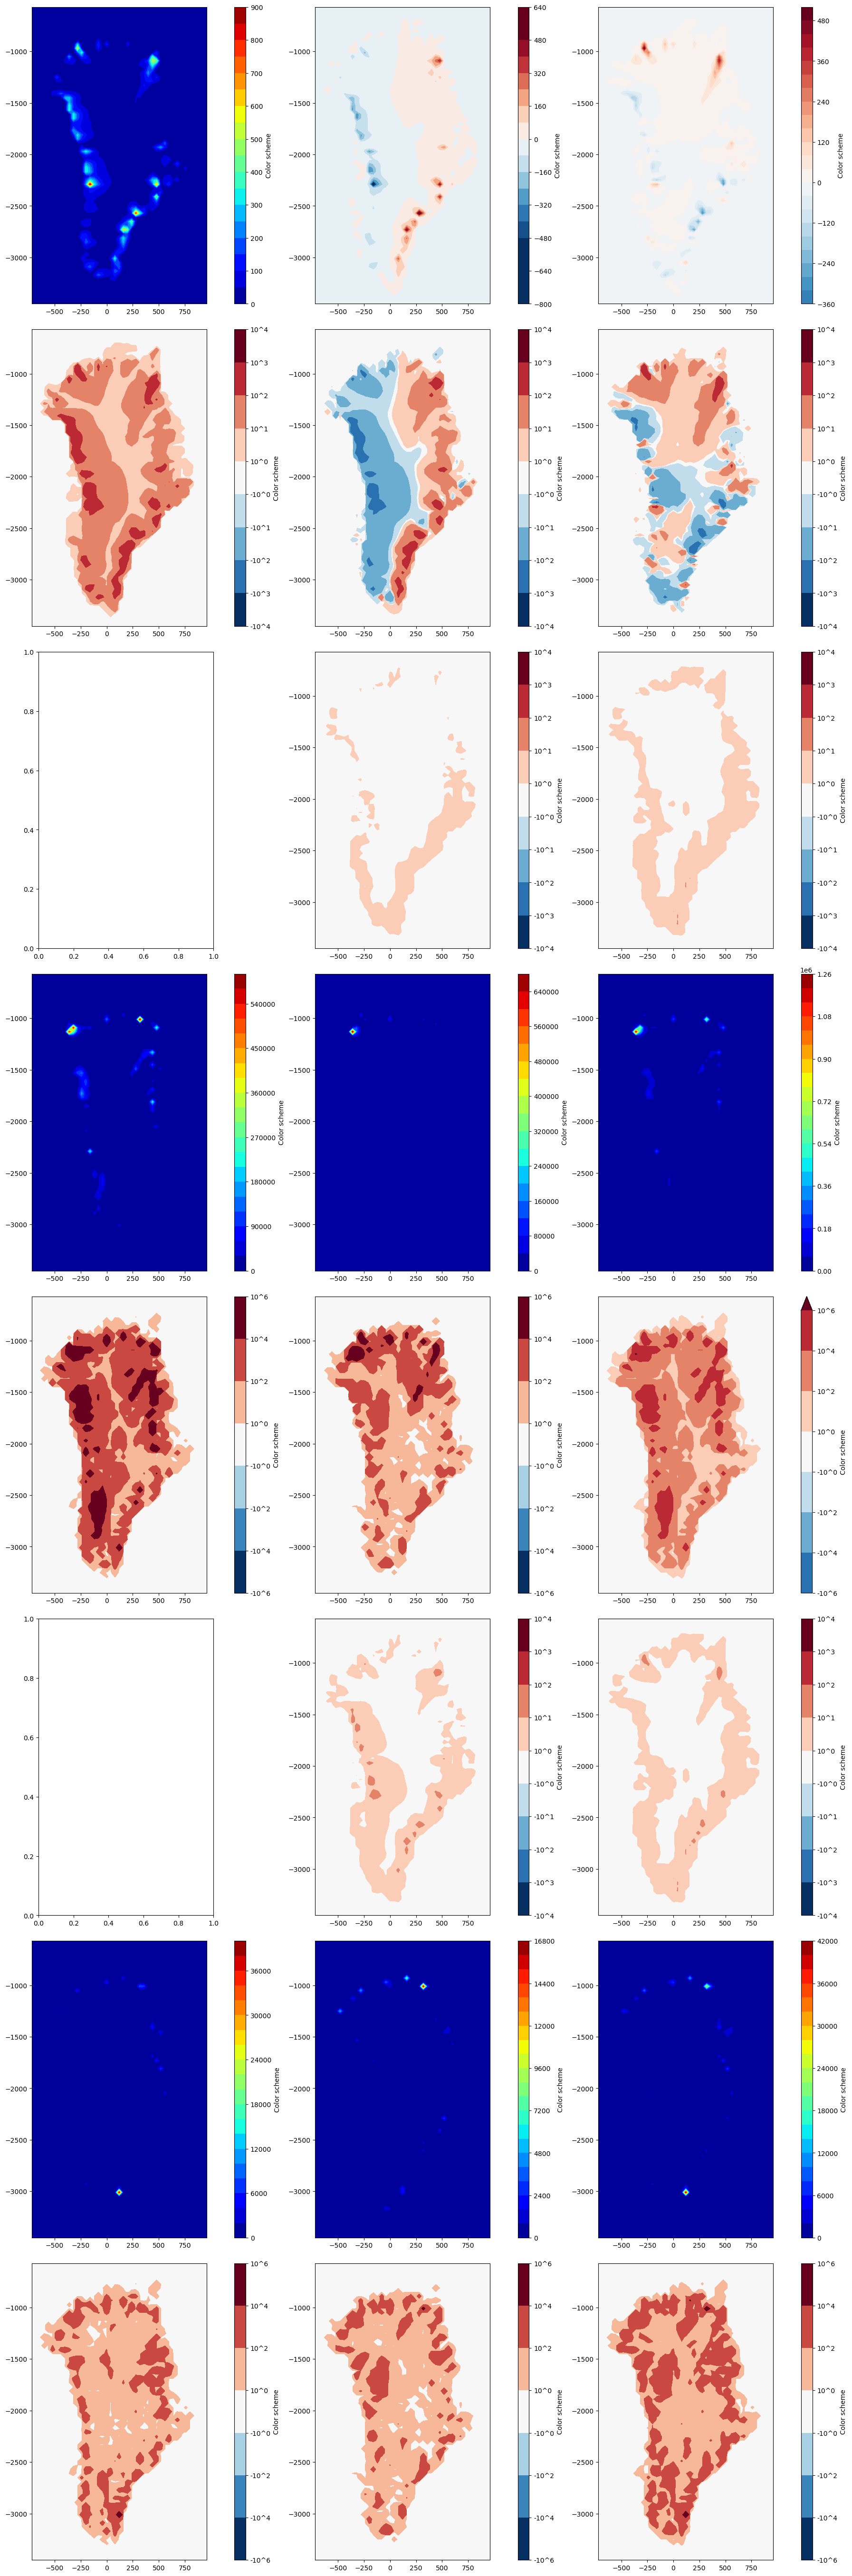

In [3]:
costs_x_unbounded = 0.5*(vx_data - vx_model)**2 / vx_uncert_unbounded_data**2 
costs_y_unbounded = 0.5*(vy_data - vy_model)**2 / vy_uncert_unbounded_data**2
costs_x = 0.5*(vx_data - vx_model)**2 / vx_uncert_data**2 
costs_y = 0.5*(vy_data - vy_model)**2 / vy_uncert_data**2

n_rows, n_cols = 8, 3
aspect_ratio = len(ds_surfvel_model_40km['x'])/len(ds_surfvel_model_40km['y'])
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.5)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vs_data,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[0, 0])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vx_data,
                         cmap = 'RdBu_r', nbins = 20, vmin = -500, vmax = 500, fig = fig, ax = ax[0, 1])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vy_data,
                         cmap = 'RdBu_r', nbins = 20, vmin = -500, vmax = 500, fig = fig, ax = ax[0, 2])

fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                      ds_surfvel_data_40km['y'], 
                      vs_data,
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], fig = fig, ax = ax[1, 0])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                      ds_surfvel_data_40km['y'], 
                      vx_data,
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], fig = fig, ax = ax[1, 1])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                      ds_surfvel_data_40km['y'], 
                      vy_data,
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], fig = fig, ax = ax[1, 2])

mask = vx_uncert_unbounded_data > -1.e9
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                      ds_surfvel_data_40km['y'], 
                      vx_uncert_unbounded_data*mask,
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], fig = fig, ax = ax[2, 1])
mask = vy_uncert_unbounded_data > -1.e9
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                      ds_surfvel_data_40km['y'], 
                      vy_uncert_unbounded_data*mask,
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], fig = fig, ax = ax[2, 2])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_x_unbounded,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[3, 0])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_y_unbounded,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[3, 1])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_x_unbounded + costs_y_unbounded,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[3, 2])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_x_unbounded,
                         cmap = 'RdBu_r', nbins = None, bin_edges = [0, 2, 4, 6], fig = fig, ax = ax[4, 0])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_y_unbounded,
                         cmap = 'RdBu_r', nbins = None, bin_edges = [0, 2, 4, 6], fig = fig, ax = ax[4, 1])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_x_unbounded + costs_y_unbounded,
                         cmap = 'RdBu_r', nbins = None, bin_edges = [0, 2, 4, 6], fig = fig, ax = ax[4, 2])
mask = vx_uncert_data > -1.e9
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                      ds_surfvel_data_40km['y'], 
                      vx_uncert_data*mask,
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], fig = fig, ax = ax[5, 1])
mask = vy_uncert_data > -1.e9
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                      ds_surfvel_data_40km['y'], 
                      vy_uncert_data*mask,
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], fig = fig, ax = ax[5, 2])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_x,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[6, 0])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_y,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[6, 1])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_x + costs_y,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[6, 2])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_x,
                         cmap = 'RdBu_r', nbins = None, bin_edges = [0, 2, 4, 6], fig = fig, ax = ax[7, 0])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_y,
                         cmap = 'RdBu_r', nbins = None, bin_edges = [0, 2, 4, 6], fig = fig, ax = ax[7, 1])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_x + costs_y,
                         cmap = 'RdBu_r', nbins = None, bin_edges = [0, 2, 4, 6], fig = fig, ax = ax[7, 2])
plt.tight_layout()

np.sum(costs_x_unbounded), np.sum(costs_y_unbounded), np.sum(costs_x_unbounded) + np.sum(costs_y_unbounded), \
np.sum(costs_x), np.sum(costs_y), np.sum(costs_x) + np.sum(costs_y)